4차원 이상일 경우 feature 두 개의 상관관계만 플롯할 수 있음

principal component 주성분

# 주성분 분석(Principal Component Analysis)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Iris 데이터 차원축소

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
from sklearn.preprocessing import StandardScaler
iris_std = StandardScaler().fit_transform(iris.data)

In [6]:
iris_std[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

### Scikit-Learn으로 차원 축소

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [5]:
iris_pca = pca.fit_transform(iris_std)
iris_pca[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [7]:
pca.explained_variance_ratio_       #array([첫번째 주성분, 두번째 주성분]) 첫번째와 두번째 주성분을 합해서 총 96%의 데이터 사용가능

array([0.72962445, 0.22850762])

### PCA 전후 분류 비교

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [9]:
# 원본 데이터로 분류
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, random_state=2021
)
rfc = RandomForestClassifier(random_state=2021)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.8947368421052632

In [10]:
# PCA 데이터로 분류
X_train, X_test, y_train, y_test = train_test_split(
    iris_pca, iris.target, stratify=iris.target, random_state=2021
)
rfc = RandomForestClassifier(random_state=2021)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.8947368421052632

### 데이터 시각화

In [12]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


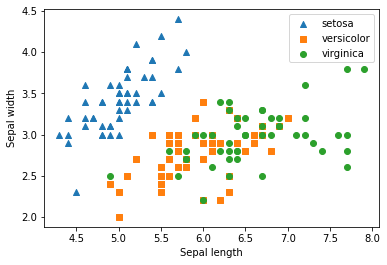

In [16]:
# Original Sepal length vs Sepal width

markers = ['^', 's', 'o']       # Setosa-세모, Versicolor-네모, Virginica-동그라미

for i, marker in enumerate(markers):
    x_axis_data = df[df.species == i]['sepal length (cm)']
    y_axis_data = df[df.species == i]['sepal width (cm)']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, 
                label=iris.target_names[i])
plt.legend()
plt.xlabel('Sepal length'); plt.ylabel('Sepal width')
plt.show()

In [18]:
# PCA
df['PC1'] = iris_pca[:,0]
df['PC2'] = iris_pca[:,1]
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,PC1,PC2
0,5.1,3.5,1.4,0.2,0,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,0,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,0,-2.364229,-0.341908


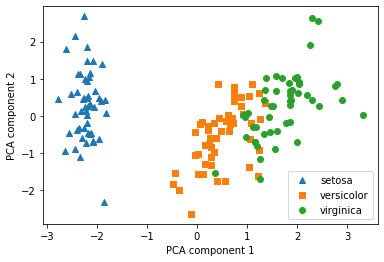

In [19]:
for i, marker in enumerate(markers):
    x_axis_data = df[df.species == i]['PC1']
    y_axis_data = df[df.species == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, 
                label=iris.target_names[i])
plt.legend()
plt.xlabel('PCA component 1'); plt.ylabel('PCA component 2')
plt.show()